# Question 3

In [315]:
import numpy as np
import matplotlib.pyplot as plt
import re
from tqdm import trange

In [316]:
# global variables
K = 20
LAMB = 0.1
MAX_ITER = 40
M = 1682
N = 943

In [313]:
# Initialize Q and P
def initialize():
    q = np.random.uniform(0, np.sqrt(5/K), (M,K))
    p = np.random.uniform(0, np.sqrt(5/K), (N,K))
    return q,p
        
# Update epsilon
def update_epsilon(qi, pu, riu):
    epsl = 2 * (riu - qi@pu)
    return epsl

# string line to integars
def line2int(line):
    l = [int(v) for v in re.findall(r"\d+",line)]
    return (l[0]-1, l[1]-1, l[2])

# Compute the error
def error(path, q, p):
    e = 0
    with open(path) as f:
        for line in f:
            u, i, rating = line2int(line)
            e += (rating - q[i]@p[u]) ** 2
    
    e += LAMB * (np.linalg.norm(p) ** 2 + np.linalg.norm(q) ** 2)
    
    return e

# Do Iteration
def iterate(q, p, path, eta, num_iter = MAX_ITER):
    it = 0
    errors = [error(path, q, p)]
    q_new = np.copy(q)
    p_new = np.copy(p)
    
    while it < num_iter:
        with open(path) as f:
            for line in f:
                u, i, rating = line2int(line)
                epsl = 2 * (rating - q[i]@p[u])
                q_new[i] = (1-2*LAMB*eta)*q[i] + eta*epsl*p[u]
                p_new[u] = (1-2*LAMB*eta)*p[u] + eta*epsl*q[i]            
                q = np.copy(q_new)
                p = np.copy(p_new)
                if np.abs(epsl) > 1e4:
                    return [np.Infinity]*num_iter
                
        # print(errors[-1])
        errors.append(error(path, q, p))
        it += 1
    return errors

# Search a good learning rate eta
def search_eta(q, p, path, num_iter):
    etas = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]
    l = []
    for j in trange(len(etas)):
        eta = etas[j]
        l.append((eta, iterate(q,p,path,eta, num_iter)))
    ind_best = np.where([v[1][-1] == np.min([v[1][-1] for v in l]) for v in l])[0][0]
    eta_best = l[ind_best][0]  
    return eta_best

# Plot the errors versus number of iterations
def plot(errors):
    plt.figure()
    plt.plot(errors, 'ro-')
    plt.xlabel('number of iterations')
    plt.ylabel('error')
    plt.show()

# Solution
def solve_3b(path):
    q,p = initialize()
    eta = search_eta(q,p,path,10)
    print('Eta is: ', eta)
    errors = iterate(q,p,path,eta)
    plot(errors)





  0%|          | 0/7 [00:00<?, ?it/s]



 14%|█▍        | 1/7 [00:27<02:46, 27.72s/it]



 29%|██▊       | 2/7 [00:55<02:18, 27.72s/it]



 43%|████▎     | 3/7 [01:22<01:50, 27.67s/it]



 57%|█████▋    | 4/7 [01:50<01:22, 27.67s/it]



 71%|███████▏  | 5/7 [02:18<00:55, 27.69s/it]



 86%|████████▌ | 6/7 [02:45<00:27, 27.64s/it]



100%|██████████| 7/7 [02:46<00:00, 19.49s/it]





Eta is:  0.02


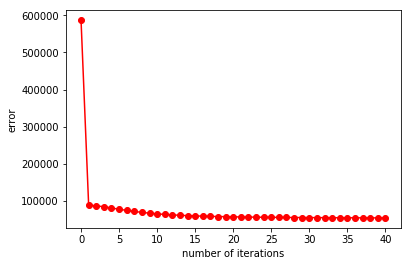

In [312]:
if __name__ == '__main__':
    solve_3b('data/ratings.train.txt')